# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other columns.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 1 
Read the dataset given in file named 'bigcity.csv'.

In [4]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
#from google.colab import files

#uploaded = files.upload()

In [72]:
# Read the file and see a few rows
import numpy as np
import pandas as pd
from sklearn import metrics

bc_df = pd.read_csv('bigcity.csv',usecols = [1,2])
bc_df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# Question 2 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can use shape function to get the size of the dataframe


In [41]:
# get the shape
print('The number of rows in the dataset = {}'.format(bc_df.shape[0]))
#Reshaping to make it compatible with linear regression model
X = bc_df['u']
y = bc_df['x']
X = X.values.reshape(-1,1)


The number of rows in the dataset = 49


# Question 3 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [42]:
print ('Count of missing values in each column\n',bc_df.isna().sum())

Count of missing values in each column
 u    0
x    0
dtype: int64


In [43]:
bc_df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u can be a good predictor of variable x

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [44]:
from sklearn.model_selection import train_test_split

#Use of train_test_split function to split feature sets ti training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print ('Size of Training feature set : ', X_train.size)
print ('Size of Test feature set : ', X_test.size)

Size of Training feature set :  39
Size of Test feature set :  10


# Question 5 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [45]:
#Reference link - http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Fit the linear regression model

In [50]:
#Apply lr model 
from sklearn.linear_model import LinearRegression

# invoke the LinearRegression function 
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Let us explore the coefficients for each of the independent attributes
import numpy as np   
m1 = linearRegression_model.coef_
print("The coefficient for X is {}".format(m1[0]))
c1 = linearRegression_model.intercept_

The coefficient for X is 1.1594512342174779


# Question 6 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

Text(0, 0.5, 'x')

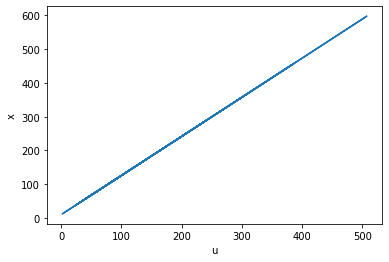

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

y = m1*X_train + c1
plt.plot(X_train,y)
plt.xlabel('u')
plt.ylabel('x')

# Question 7 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 

y_pred = linearRegression_model.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

The Root Mean Sq Error is 23.385235190249123 and R^2 error is 0.9181922560396981


## Question 8 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [68]:
#Train accuracy
linearRegression_model.score(X_train, y_train)

0.9682175540860046

In [69]:
#Test accuracy 
linearRegression_model.score(X_test, y_test)

0.9181922560396981

## Supervised Learning - Building a Student Performance Prediction System  

# Question 1 
#### The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Question 1 - Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
#from google.colab import files

#uploaded = files.upload()

Saving students-data.csv to students-data.csv


In [144]:
# Read dataset using pandas and print few rows
from sklearn import metrics

sd_df = pd.read_csv('students-data.csv',delimiter = ';')
sd_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [145]:
#print the columns in the dataframe
sd_df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

## Question 3 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [146]:
sd_df.index.name = 'number'
sd_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

## Question 4

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [147]:
sd_objects = sd_df.select_dtypes(include = 'object')
sd_objects.columns.tolist()

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## Question 5 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [148]:
sd_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [149]:
for col in sd_df.var().index.tolist():
    if sd_df.var()[col] < 1:
        sd_df.pop(col)

In [150]:
sd_df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'goout',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 6 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [151]:
from sklearn.preprocessing import LabelEncoder

ls = LabelEncoder()

for col in sd_df:
    if col in sd_objects.columns:
        sd_df[col] = ls.fit_transform(sd_df[col])

sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  schoolsup   395 non-null    int32
 13  famsup      395 non-null    int32
 14  paid        395 non-null    int32
 15  activities  395 non-null    int32
 16  nursery     395 non-null    int32
 17  higher      395 non-null    int32
 18  internet    395 non-null    int32
 19  romantic    395 non-null    int32
 20  goout       395 non-null    int6

## Question 7 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [152]:
sd_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [153]:
import numpy as np
sd_df['G1'] = np.where(sd_df['G1'] >= 10, 1, 0)
sd_df['G2'] = np.where(sd_df['G2'] >= 10, 1, 0)
sd_df['G3'] = np.where(sd_df['G3'] >= 10, 1, 0)
sd_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 8 - Apply the models.
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [172]:
# Target values are G3
y = sd_df['G3']

# Feature set is remaining features
X = sd_df.iloc[:,:-1]

## Visualization

## Question 9

*Plot G2 and G3 and give your understanding on relation between both variables.*

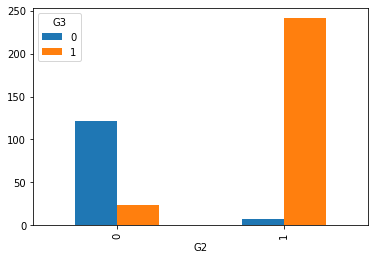

In [173]:
pd.crosstab(sd_df['G2'], sd_df['G3']).plot(kind = 'bar')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 10

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [174]:
schools = sd_df['school'].unique()
no_of_students = sd_df['school'].value_counts()

([<matplotlib.axis.XTick at 0x2d70da56908>,
 <a list of 2 Text xticklabel objects>)

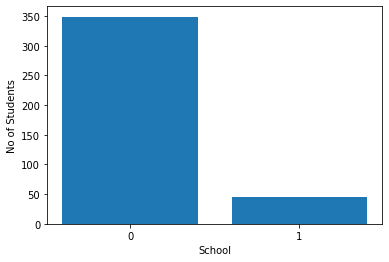

In [175]:
plt.bar(schools, no_of_students)
plt.xlabel('School')
plt.ylabel('No of Students')
plt.xticks([0,1])

## Question 11 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [177]:
from sklearn.model_selection import  train_test_split
# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = sd_df.shape[0] - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = num_test, random_state = 1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Question 12 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Logistic Regression

In [192]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print("Using Logistic Regression classification:")
print("Training Sets: The Accuracy Score is {}".format(accuracy_score(y_train, y_train_pred)))
print("Training Sets: The F1 Score is {}".format(f1_score(y_train,y_train_pred)))

y_pred = clf.predict(X_test)
print("Test Sets: The Accuracy Score is {}".format(accuracy_score(y_test, y_pred)))
print("Test Sets: The F1 Score is {}".format(f1_score(y_test,y_pred)))

Using Logistic Regression classification:
Training Sets: The Accuracy Score is 0.9366666666666666
Training Sets: The F1 Score is 0.9511568123393316
Test Sets: The Accuracy Score is 0.9052631578947369
Test Sets: The F1 Score is 0.931297709923664


Naive Bayes Classifier

In [194]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print("Using Naive Bayes classification:")
print("Training Sets: The Accuracy Score is {}".format(accuracy_score(y_train, y_train_pred)))
print("Training Sets: The F1 Score is {}".format(f1_score(y_train,y_train_pred)))

y_pred = clf.predict(X_test)
print("Test Sets: The Accuracy Score is {}".format(accuracy_score(y_test, y_pred)))
print("Test Sets: The F1 Score is {}".format(f1_score(y_test,y_pred)))

Using Naive Bayes classification:
Training Sets: The Accuracy Score is 0.8966666666666666
Training Sets: The F1 Score is 0.9186351706036745
Test Sets: The Accuracy Score is 0.8842105263157894
Test Sets: The F1 Score is 0.9147286821705426


K-neighbours Classifier

In [195]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print("Using KNN classification using n = 3:")
print("Training Sets: The Accuracy Score is {}".format(accuracy_score(y_train, y_train_pred)))
print("Training Sets: The F1 Score is {}".format(f1_score(y_train,y_train_pred)))

y_pred = clf.predict(X_test)
print("Test Sets: The Accuracy Score is {}".format(accuracy_score(y_test, y_pred)))
print("Test Sets: The F1 Score is {}".format(f1_score(y_test,y_pred)))

Using KNN classification using n = 3:
Training Sets: The Accuracy Score is 0.8633333333333333
Training Sets: The F1 Score is 0.9026128266033254
Test Sets: The Accuracy Score is 0.7578947368421053
Test Sets: The F1 Score is 0.8413793103448275
